## Create a predictive model using scikit-learn to predict vehicle MPG from vehicle characteristic data.
* The data for this part is from [EPA fuel ecomony](https://www.fueleconomy.gov/) website.
* For the purpose of this programming exercise, we have downloaded this data and modified it to create a reasonably clean analytical data set.
* The data set includes the model years 2020-2023.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Read the car MPG data
carDataRead = pd.read_csv("carDataMPG2023.csv")
carDataRead.head(10)

,id,make,model,year,fuelType1,drive,trany,VClass,cylinders,displ,speeds,drive_number,avgMpg
0,41213,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,46.31000
1,41215,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,2.0,6.0,2,42.54910
2,41216,Toyota,Corolla XSE,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,45.39342
3,41218,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,1.8,6.0,2,44.54000
4,41222,Kia,Soul,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Small Station Wagons,4.0,2.0,6.0,2,35.47000
5,41223,Kia,Soul,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AM-S7),Small Station Wagons,4.0,1.6,7.0,2,37.86000
6,41227,Kia,Sportage FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 2WD,4.0,2.4,6.0,2,33.36895
7,41228,Kia,Sportage FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 2WD,4.0,2.0,6.0,2,29.61000
8,41229,Kia,Telluride FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S8),Small Sport Utility Vehicle 2WD,6.0,3.8,8.0,2,29.00000
9,41230,Kia,Sportage AWD,2020,Regular Gasoline,All-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 4WD,4.0,2.4,6.0,4,30.21267


### Next create Numpy arrays of the predictor and target variables.
* The predictor variables will be the columns `cylinders`, `displ`, `speeds` and `drive_number`
    * Call the array of predictor variables X
* The target variable will be the column `avgMpg`
    * Call the array of target variable Y
* The Numpy `np.array()` function can convert a homogeneous section of a data frame to a Numpy array.

In [3]:
# Define the predictor variables
predictor_cols = ["cylinders", "displ", "speeds", "drive_number"]

# Create the NumPy array of predictor variables (X)
X = np.array(carDataRead[predictor_cols])

# Define the target variable
target_col = "avgMpg"

# Create the NumPy array of target variable (Y)
Y = np.array(carDataRead[target_col])

# Print NumPy array of target variable
Y

array([46.31   , 42.5491 , 45.39342, ..., 64.02492, 19.75   , 18.45   ])

### Print out the number of vehicles in the dataset

In [4]:
# Get the number of rows in the DataFrame
num_vehicles = len(carDataRead)

print("Number of vehicles in the dataset:", num_vehicles)


Number of vehicles in the dataset: 4536


### Split the X and Y arrays into training and testing datasets using `train_test_split()`.
* Keep 80% of the data for training and 20% for testing. 
* Call the training and testing splits `X_train`, `Y_train`, `X_test` and `Y_test`.

In [5]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### Plot the histograms of `Y_test` and `Y_train` to make sure they are comparable.
* With a large dataset of this size, this is less of a problem than with small data set.
* Nonetheless  it is worth checking that the training-test split has not biased one of these subsets in one way or another.

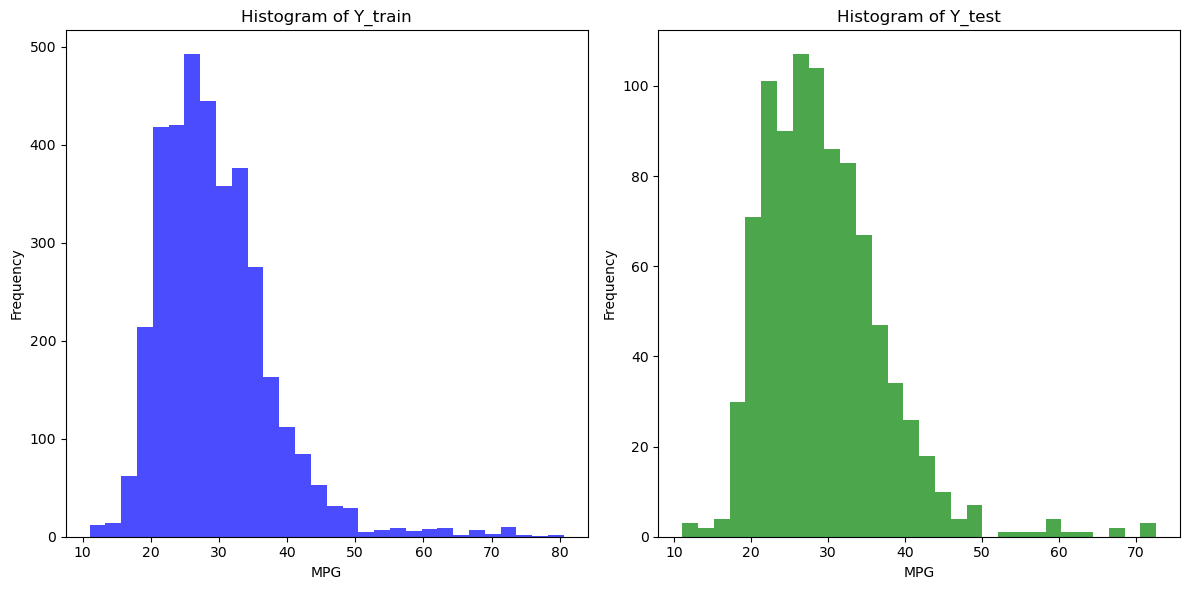

In [6]:
import matplotlib.pyplot as plt

# Plot histograms of Y_train and Y_test
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(Y_train, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Y_train')
plt.xlabel('MPG')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(Y_test, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Y_test')
plt.xlabel('MPG')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Linear regression fit
* Use the `LinearRegression` model in scikit learn to fit a regression model with `X_train` as the predictor variable and `Y_train` as the target.
* Use `fit` to predict the `avgMpg` from `X_fit`, and called the predicted value `Y_pred`.

In [7]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

### Outputs
* Print the regression coefficients
* Print the mean squared error between `Y_test` and `Y_pred`
* Print the R^2, called the [coefficient of determination,](https://en.wikipedia.org/wiki/Coefficient_of_determination) between `Y_test` and `Y_pred`

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Print regression coefficients
print("Regression coefficients:", model.coef_)

# Print mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Print R^2
r2 = r2_score(Y_test, Y_pred)
print("R^2:", r2)


Regression coefficients: [-1.40080761 -2.21594785 -0.90650685 -1.26168815]
Mean Squared Error: 27.395100517243634
R^2: 0.5660893790590538


### Scatter plots
* Create scatter plots of `Y_test` and `Y_pred` against each of the 4 predictor variables `cylinders`, `displ`, `speeds`, `drive_number`.
* Do this as subplots in a 2 X 2 grid. 
* Label the subplots appropriately.
* Include axis labels also.

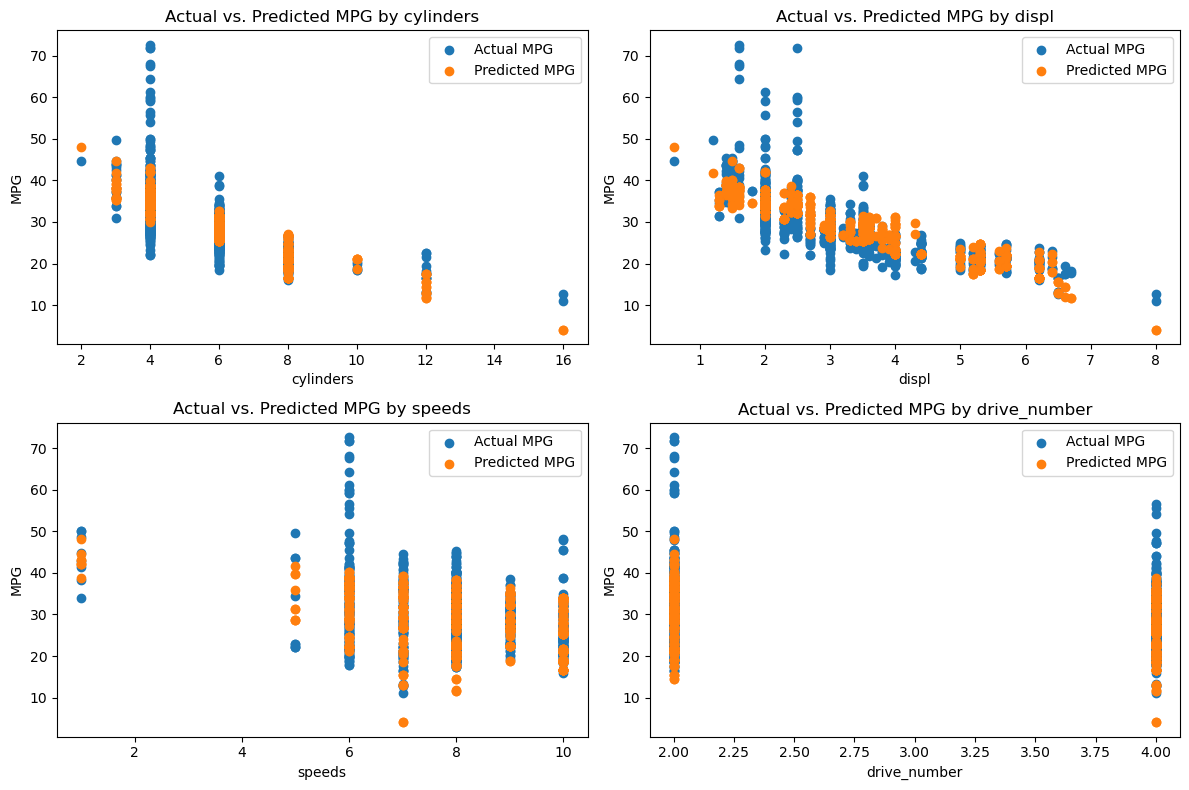

In [9]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot scatter plots for each predictor variable
predictor_vars = ["cylinders", "displ", "speeds", "drive_number"]

for i, ax in enumerate(axes.flat):
    # Get the column index by finding the position of the variable name in the list
    col_index = predictor_vars.index(predictor_vars[i])
    ax.scatter(X_test[:, col_index], Y_test, label="Actual MPG")
    ax.scatter(X_test[:, col_index], Y_pred, label="Predicted MPG")
    ax.set_xlabel(predictor_vars[i])
    ax.set_ylabel("MPG")
    ax.set_title(f"Actual vs. Predicted MPG by {predictor_vars[i]}")
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()